In [8]:
import pandas as pd

In [24]:
xray = pd.read_csv('xray.csv')
xray.head()

x          y
0 -0.321173 -11.328641
1  0.426468  -6.584727
2 -0.664453 -11.802339
3  0.823246 -11.919965
4  1.186749 -10.923852

# Scatterplot of the data

<AxesSubplot:xlabel='x', ylabel='y'>

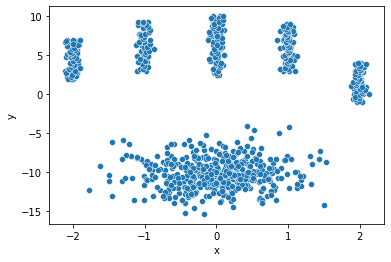

In [44]:
import seaborn as sns
sns.scatterplot(x=xray['x'], y=xray['y'])

### looks like it's there's 6 clusters. The "palm", and the "fingers" (which can be decomposed into 5 smaller clusters, one for each finger)

# K-means with two clusters

<AxesSubplot:xlabel='x', ylabel='y'>

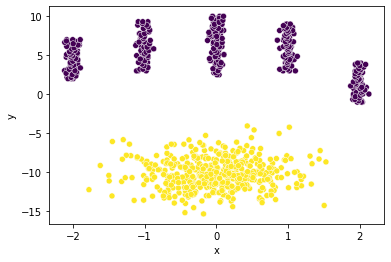

In [37]:
from sklearn.cluster import KMeans
kmeans2 = KMeans(init="random", n_clusters=2, n_init=10, max_iter=300)
kmeans2.fit(xray)
sns.scatterplot(x=xray['x'], y=xray['y'], c=kmeans2.labels_)

### K-means separates the palm from the fingers!

# K-means with 6 clusters

<AxesSubplot:xlabel='x', ylabel='y'>

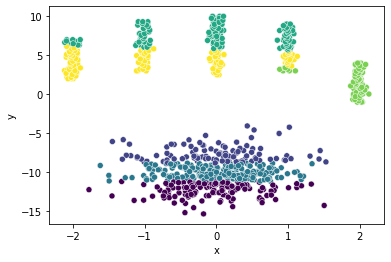

In [38]:
kmeans6 = KMeans(init="random", n_clusters=6, n_init=10, max_iter=300)
kmeans6.fit(xray)
sns.scatterplot(x=xray['x'], y=xray['y'], c=kmeans6.labels_)

### K-means doesn't do a great job of seaprating the 5 fingers from each other. Also the palm gets split in three

# Hierarchical clustering dendogram

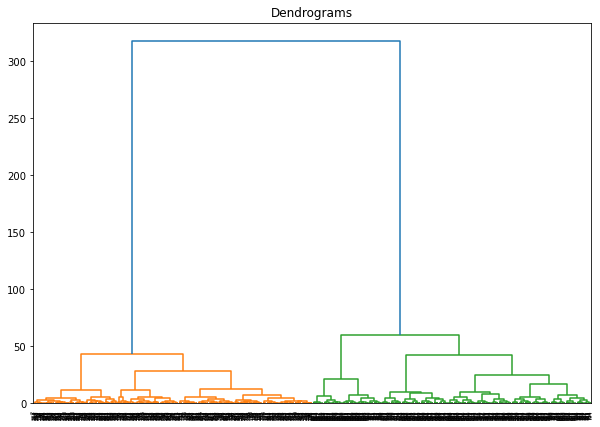

In [25]:
import scipy.cluster.hierarchy as shc
import pylab
pylab.figure(figsize=(10, 7))  
pylab.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(xray, method='ward'))

# Hierarchical clustering with 2 clusters

<AxesSubplot:xlabel='x', ylabel='y'>

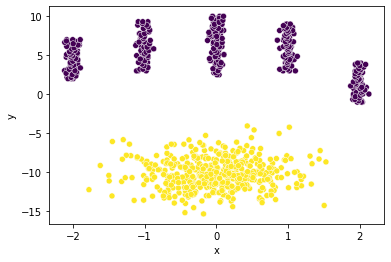

In [45]:
from sklearn.cluster import AgglomerativeClustering
hierarchical2 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
hierarchical2.fit_predict(xray)
sns.scatterplot(x=xray['x'], y=xray['y'], c=hierarchical2.labels_)

### Looks like hierarchical clustering also separates the palm from the fingers

<AxesSubplot:xlabel='x', ylabel='y'>

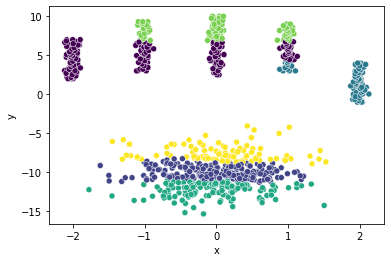

In [30]:
hierarchical6 = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')  
hierarchical6.fit_predict(xray)
sns.scatterplot(x=xray['x'], y=xray['y'], c=hierarchical6.labels_)

### Hierarchical also doesn't do a great job of seaprating the fingers, or keepng the palm intact

<AxesSubplot:xlabel='x', ylabel='y'>

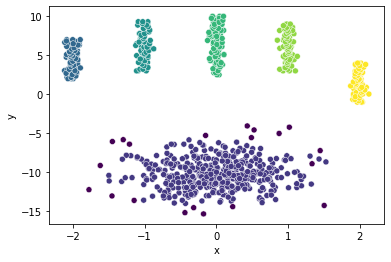

In [40]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN()
dbscan.fit(xray)
sns.scatterplot(x=xray['x'], y=xray['y'], c=dbscan.labels_)

### DBSCAN gets the 6 clusters we really want!